In [19]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

In [20]:
data=pd.read_csv('Salary_Data.csv')

In [21]:
data

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


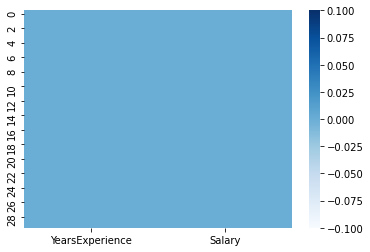

In [22]:
#cleaning data. there are no missing values 
import seaborn as sns
sns.heatmap(data.isnull(),cmap="Blues")

plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


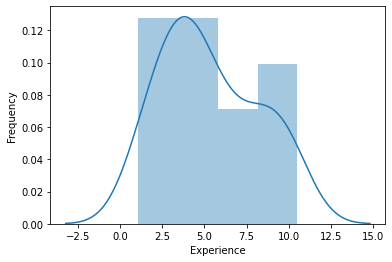

In [23]:
# normal distribution
sns.distplot(data["YearsExperience"])
plt.ylabel("Frequency")
plt.xlabel("Experience")
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


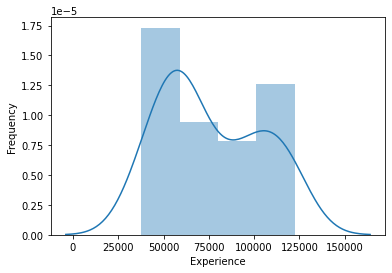

In [24]:
# normal distribution
sns.distplot(data["Salary"])
plt.ylabel("Frequency")
plt.xlabel("Experience")
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


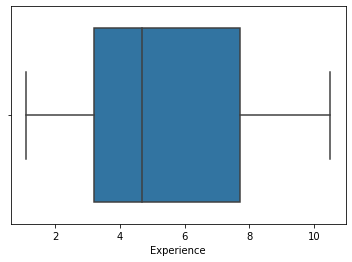

In [25]:
#Detect Outliers- using boxplot

sns.boxplot(data["YearsExperience"])
plt.xlabel("Experience")
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


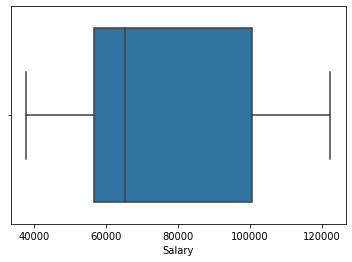

In [26]:
# No outliers detected
sns.boxplot(data["Salary"])
plt.xlabel("Salary")
plt.show()

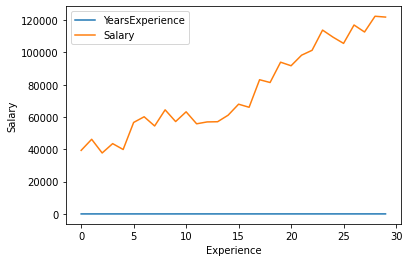

In [16]:
data.plot(kind="line")
plt.xlabel("Experience")
plt.ylabel("Salary")
plt.show()

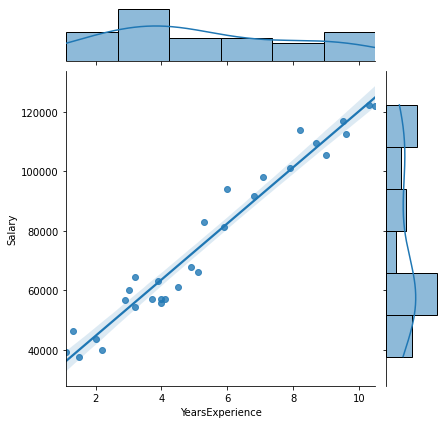

In [28]:
sns.jointplot(x="YearsExperience",y="Salary",data=data,kind="reg")
plt.xlabel("Experience")
plt.ylabel("Salary")
plt.show()

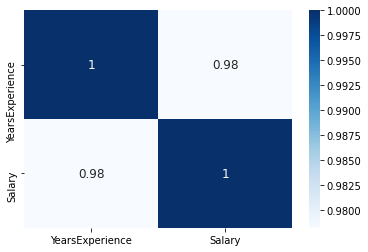

In [30]:
#Pearson Correlation
corr = data.corr(method="pearson")
sns.heatmap(corr, annot=True,annot_kws={"size":12}, cmap="Blues")
plt.show()

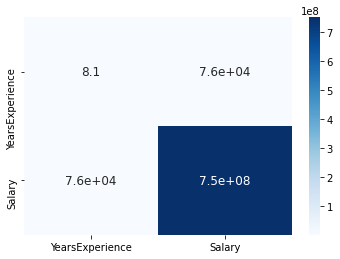

In [31]:
# covariance is approximately 0.0076
cov = data.cov()
sns.heatmap(cov, annot=True,annot_kws={"size":12}, cmap="Blues")
plt.show()

In [32]:
x = np.array(data["YearsExperience"])
y = np.array(data["Salary"])

In [33]:
x = x.reshape(-1,1)
y = y.reshape(-1,1)

In [34]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2, 
random_state=0)

In [40]:
#Normalize data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [46]:
#r-squared is 94%
from sklearn.linear_model import LinearRegression
reg = LinearRegression().fit(x_train, y_train)
reg.score(x_train, y_train)


0.9411949620562126

In [48]:
reg.get_params()

{'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'normalize': False}

In [50]:
y_pred = reg.predict(x_test)
pd.DataFrame(y_pred, columns = ["Predicted salary"])

,Predicted salary
0,40748.961841
1,122699.622956
2,64961.657170
3,63099.142145
4,115249.562855
5,107799.502753
